In [21]:
import xarray as xr
import os

In [18]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np

In [19]:
plt.rcParams['font.size'] = 18

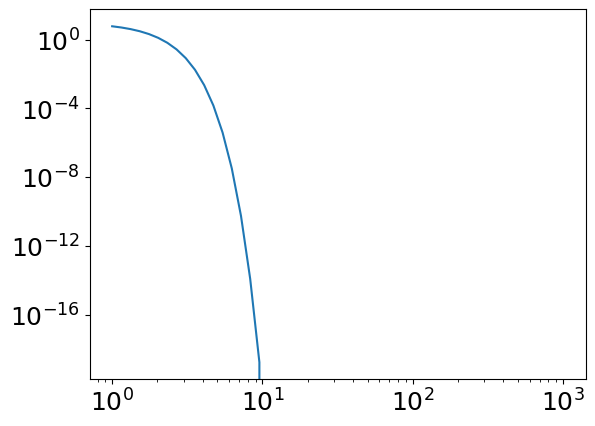

In [35]:
N_pixels = 2**20    # Number of pixels

def pow_spec(k):
    P0, k0, gamma = [.2, 5, 4]
    return P0 / ((1. + (k/k0)**2)**(gamma / 2))

def pow_spec(k):
    P0, gamma = [10., 1e0]
    
    return P0 * np.exp(-0.5*(k/gamma)**2)

# def pow_spec(k):
#     P0 = 1e0
#     return np.where(k==0, 0, P0*k**-2.)

# def pow_spec(k):
#     P0 = 1e0
#     return np.where(k==0, 0, P0*k**-1.)

def pow_spec(k):
    P0, gamma = [10., 1e0]
    
    return np.where(k>10, 0, P0 * np.exp(-0.5*(k/gamma)**2))

k = jnp.logspace(0, 3)
plt.loglog(k, pow_spec(k))

(1e-15, 1000.0)

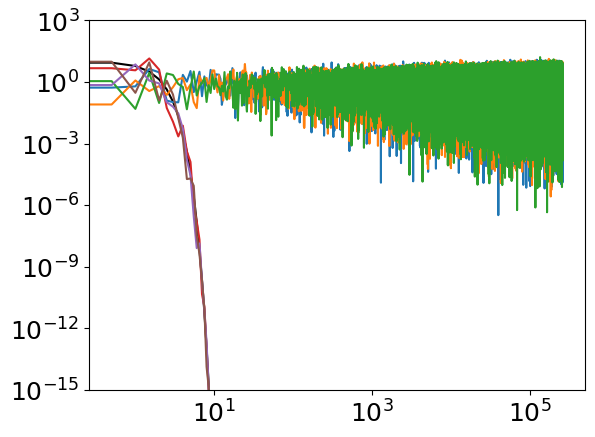

In [36]:
x = jnp.arange(-1, 1, 2/N_pixels)
y = np.random.randn(N_pixels, 3)
k = jnp.fft.rfftfreq(N_pixels, np.diff(x)[0])
Pk = pow_spec(k)

Y = jnp.fft.rfft(y, norm='ortho', axis=0)
# Y = np.random.randn(N_pixels//2 + 1, 1) + 1.j*np.random.randn(N_pixels//2 + 1, 1)
Y_ = jnp.sqrt(Pk)[:,None] * Y

y_ = jnp.fft.irfft(Y_, norm='ortho', axis=0)

plt.loglog(k, Pk, 'k', ms=100)
plt.loglog(k, np.abs(Y)**2)
plt.loglog(k, np.abs(Y_)**2)
plt.ylim(1e-15, 1e3)

In [39]:
C = jnp.fft.irfft(Pk, norm='ortho', axis=0)

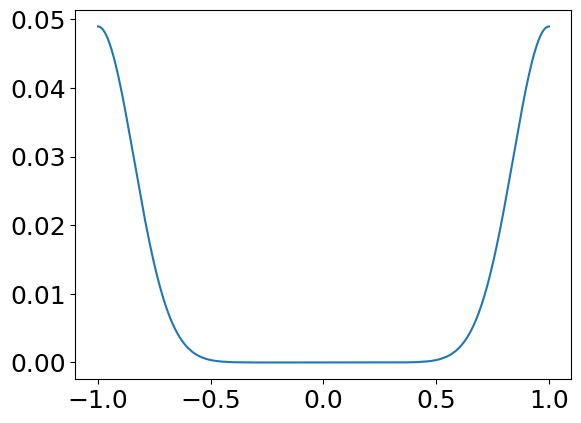

In [40]:
plt.plot(x, C)

In [37]:
np.sum(np.abs(Y_)>0, axis=0)*2

array([42, 42, 42])

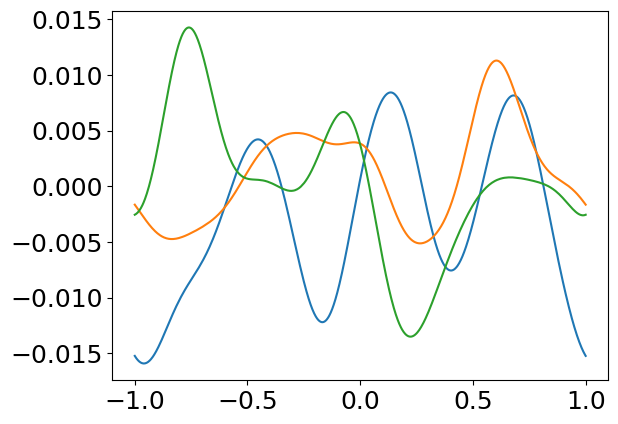

In [38]:
# plt.plot(x, y)
plt.plot(x, y_.real)
# plt.plot(x, y_.imag)

In [9]:
from scipy.linalg import dft

In [10]:
from time import time

In [ ]:
t = np.arange(-2, )

In [15]:
for i in range(10, 27):
    s = time()
    N = 2**i
    x = np.random.randn(N)
    X = np.fft.fft(x)
    total_t = time()-s
    print(f'N: 2**{i :2}  time: {1e3*(total_t) :5.2f} ms   NlogN: {N*np.log(N)/total_t/1e8:.3f}')

N: 2**10  time: 13.25 ms   NlogN: 0.536
N: 2**11  time:  0.40 ms   NlogN: 39.431
N: 2**12  time:  0.48 ms   NlogN: 70.393
N: 2**13  time:  0.76 ms   NlogN: 96.513
N: 2**14  time:  1.50 ms   NlogN: 106.154
N: 2**15  time:  2.74 ms   NlogN: 124.389
N: 2**16  time:  5.58 ms   NlogN: 130.255
N: 2**17  time:  7.87 ms   NlogN: 196.299
N: 2**18  time: 13.65 ms   NlogN: 239.628
N: 2**19  time: 21.97 ms   NlogN: 314.339
N: 2**20  time: 37.30 ms   NlogN: 389.716
N: 2**21  time: 74.81 ms   NlogN: 408.063
N: 2**22  time: 156.73 ms   NlogN: 408.095
N: 2**23  time: 321.72 ms   NlogN: 415.687
N: 2**24  time: 674.06 ms   NlogN: 414.055
N: 2**25  time: 1399.00 ms   NlogN: 415.622
N: 2**26  time: 2783.69 ms   NlogN: 434.468


In [18]:
for i in range(10, 16):
    s = time()
    N = 2**i
    x = np.random.randn(N)
    X = dft(N)@x
    total_t = time()-s
    print(f'N: 2**{i :2}  time: {1e3*(total_t) :5.2f} ms   N^2: {N**2/total_t/1e4:.3f}')

N: 2**10  time: 101.48 ms   N^2: 1033.274
N: 2**11  time: 312.61 ms   N^2: 1341.691
N: 2**12  time: 880.38 ms   N^2: 1905.677
N: 2**13  time: 2973.91 ms   N^2: 2256.591
N: 2**14  time: 11682.05 ms   N^2: 2297.846
N: 2**15  time: 93227.17 ms   N^2: 1151.748


In [2]:
N_ant = 2

sim_dir = "/Users/chrisfinlay/Documents/PhD/tabascal/tabascal/tabascal/examples/"
f_name = f"target_obs_{N_ant:02}A_450T-0440-1338_128I_001F-1.227e+09-1.227e+09_100AST_1SAT_0GRD/"

sim_path = os.path.join(sim_dir, f_name)

ds = xr.open_zarr(sim_path)

In [3]:
sampling = 1

N_int_samples = ds.attrs["n_int_samples"]//sampling
N_ant = ds.attrs["n_ant"]
N_bl = ds.attrs["n_bl"]
N_time = ds.attrs["n_time"]
times = ds.coords["time"].data
times_fine = ds.coords["time_fine"].data[::sampling]
bl_uvw = ds.bl_uvw.data.compute()[::sampling]
ants_uvw = ds.ants_uvw.data.compute()[::sampling]
ants_xyz = ds.ants_xyz.data.compute()[::sampling]
vis_ast = ds.vis_ast.data.compute()[::sampling]
vis_rfi = ds.vis_rfi.data.compute()[::sampling]
vis_obs = ds.vis_obs.data.compute()
noise = ds.noise_std.data.compute()
int_time = ds.attrs["int_time"]
freqs = ds.coords["freq"].data
gains_ants = ds.gains_ants.data.compute()[::sampling]
rfi_A_app = ds.rfi_sat_A.data.compute()[0,::sampling]
rfi_orbit = ds.rfi_sat_orbit.data.compute()[0]

In [4]:
vis_rfi.shape

(57600, 1, 1)

In [8]:
times_fine

array([ 439.0078125,  439.0234375,  439.0390625, ..., 1338.9609375,
       1338.9765625, 1338.9921875])

In [97]:
def gauss_filter(k, sig):
    return np.exp(-0.5* (k/sig)**2)

In [179]:
f.max()

31.99888888888889

In [319]:
t = times_fine
f = np.fft.fftfreq(len(t), np.diff(t)[0])

In [320]:
x = vis_rfi[:,0,0]
X = np.fft.fft(x)

cond = np.abs(f) > 1e2
rep = np.random.randn(len(x)) + 1.j*np.random.randn(len(x))
rep = 0

X_ = np.where(cond, rep, X)
X_ = gauss_filter(f, 3e2) * X
x_ = np.fft.ifft(X_)

In [321]:
y = vis_ast[:,0,0]
Y = np.fft.fft(y)

cond = np.abs(f)>1e2
rep = np.random.randn(len(y)) + 1.j*np.random.randn(len(y))
rep = 0
print(sum(1-cond))

Y_ = np.where(cond, rep, Y)
Y_ = gauss_filter(f, 3e2) * Y
y_ = np.fft.ifft(Y_)

57600


(-1.0, 1.0)

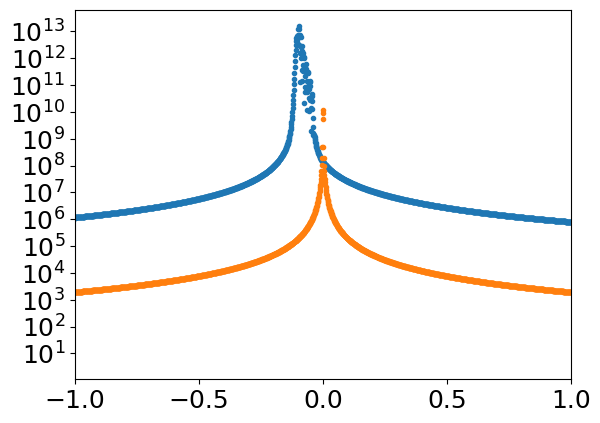

In [322]:
plt.plot(f, np.abs(X)**2, '.')
plt.plot(f, np.abs(Y)**2, '.')
# plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(-1, 1)

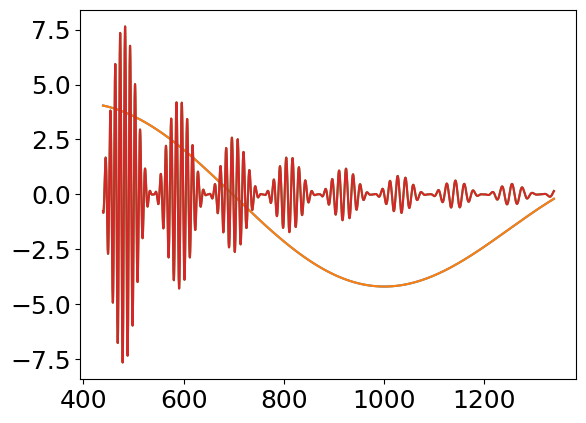

In [323]:
plt.plot(t, y)
plt.plot(t, y_)

plt.plot(t, x.real/100)
plt.plot(t, x_.real/100)

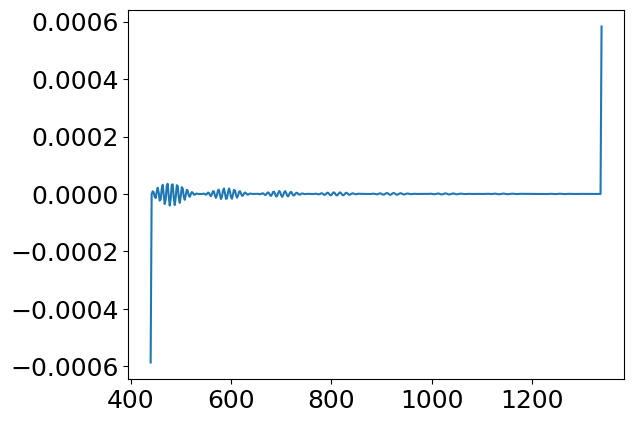

In [326]:
# plt.plot(t, np.abs(x-x_))
# plt.plot(t, np.abs(y-y_))


plt.plot((t).reshape(N_time, N_int_samples).mean(axis=1), (x-x_).reshape(N_time, N_int_samples).mean(axis=1))

In [325]:
def pad(x, N=N_int_samples):
    return np.pad(x, N, 'edge')

In [310]:
def depad(x, N=N_int_samples):
    return x[N:-N]

In [311]:
t = pad(times_fine)
f = np.fft.fftfreq(len(t), np.diff(t)[1000])

In [312]:
x = pad(vis_rfi[:,0,0])
X = np.fft.fft(x)

cond = np.abs(f) > 0.3e1
rep = np.random.randn(len(x)) + 1.j*np.random.randn(len(x))
rep = 0

X_ = np.where(cond, rep, X)
# X_ = gauss_filter(f, 1e1) * X
x_ = np.fft.ifft(X_)

In [313]:
y = pad(vis_ast[:,0,0])
Y = np.fft.fft(y)

cond = np.abs(f) > 0.3e1
rep = np.random.randn(len(y)) + 1.j*np.random.randn(len(y))
rep = 0
print(sum(1-cond))

Y_ = np.where(cond, rep, Y)
# Y_ = gauss_filter(f, 1e1) * Y
y_ = np.fft.ifft(Y_)

5425


(-1.0, 1.0)

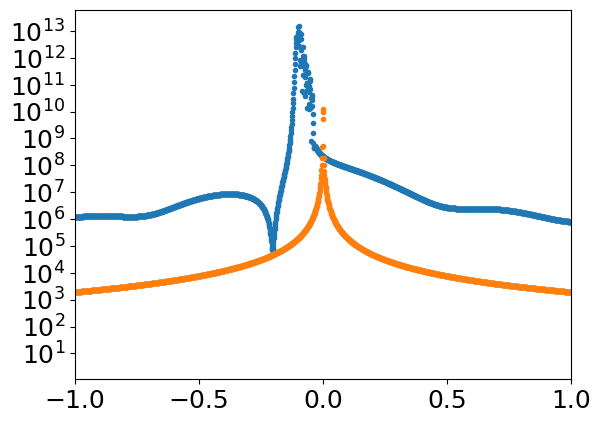

In [314]:
plt.plot(f, np.abs(X)**2, '.')
plt.plot(f, np.abs(Y)**2, '.')
# plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(-1, 1)

/Users/chrisfinlay/mambaforge/envs/tabascal/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


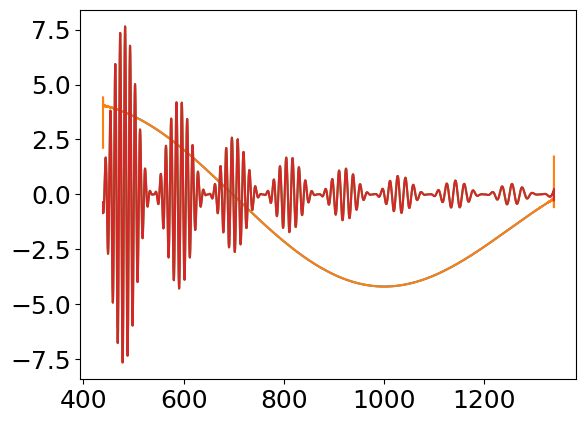

In [315]:
plt.plot(t, y)
plt.plot(t, y_)

plt.plot(t, x.real/100)
plt.plot(t, x_.real/100)

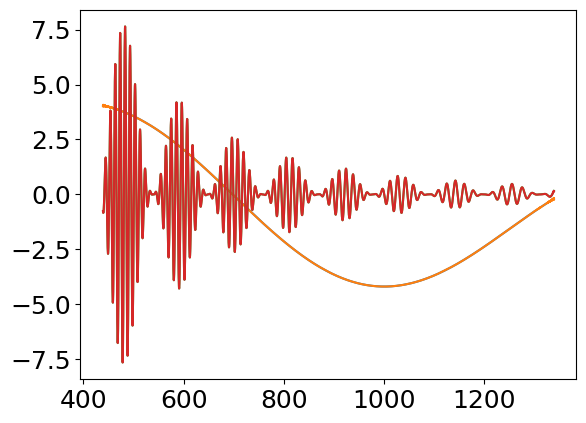

In [316]:
plt.plot(depad(t), depad(y))
plt.plot(depad(t), depad(y_))

plt.plot(depad(t), depad(x.real)/100)
plt.plot(depad(t), depad(x_.real)/100)

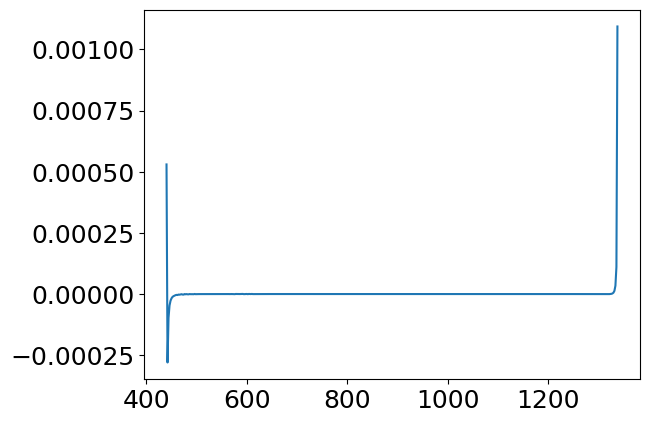

In [318]:
# plt.plot(depad(t), depad(np.abs(x-x_)))
# plt.plot(depad(t), depad(np.abs(y-y_)))

plt.plot(depad(t).reshape(N_time, N_int_samples).mean(axis=1), depad(x-x_).reshape(N_time, N_int_samples).mean(axis=1))

In [289]:
t = times_fine
f = np.fft.rfftfreq(len(t), np.diff(t)[0])

In [290]:
x = np.abs(vis_rfi[:,0,0])
X = np.fft.rfft(x)

cond = np.abs(f) > 0.3e2
rep = np.random.randn(len(x)) + 1.j*np.random.randn(len(x))
rep = 0

X_ = np.where(cond, rep, X)
X_ = gauss_filter(f, 3e2) * X
x_ = np.fft.irfft(X_)

In [291]:
y = vis_ast[:,0,0]
Y = np.fft.fft(y)

cond = np.abs(f)>1e2
rep = np.random.randn(len(y)) + 1.j*np.random.randn(len(y))
rep = 0
print(sum(1-cond))

Y_ = np.where(cond, rep, Y)
Y_ = gauss_filter(f, 3e2) * Y
y_ = np.fft.ifft(Y_)

28801


ValueError: operands could not be broadcast together with shapes (28801,) () (57600,) 

(-1.0, 1.0)

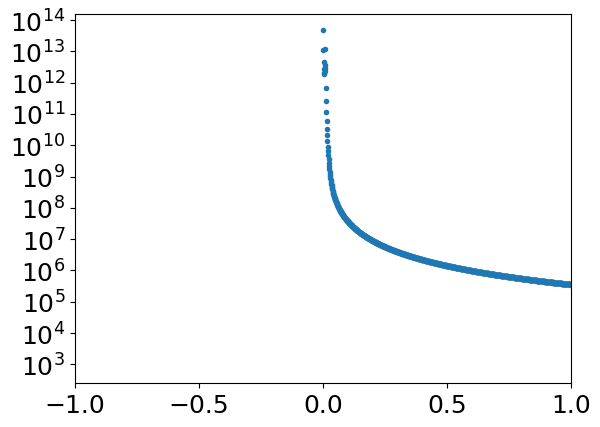

In [292]:
plt.plot(f, np.abs(X)**2, '.')
# plt.plot(f, np.abs(Y)**2, '.')
# plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(-1, 1)

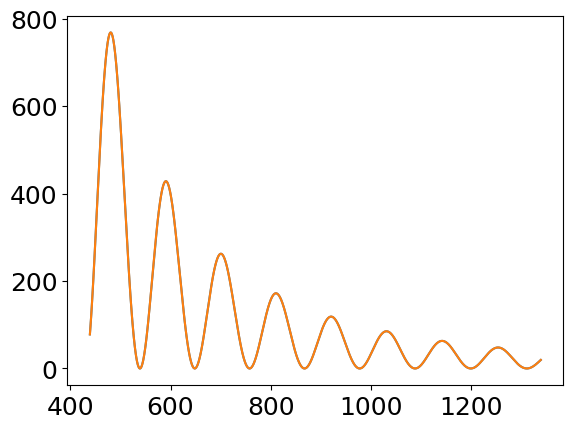

In [293]:
# plt.plot(t, y)
# plt.plot(t, y_)

plt.plot(t, x.real)
plt.plot(t, x_.real)

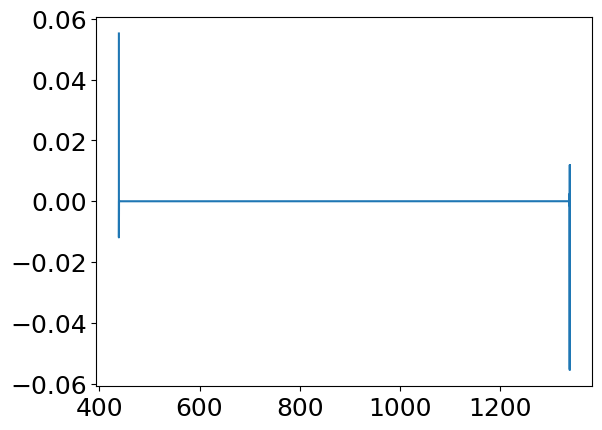

In [295]:
# plt.plot(t, np.abs(x-x_))
plt.plot(t, x-x_)
# plt.plot(t, np.abs(y-y_))

In [296]:
def pad(x, N=N_int_samples):
    return np.pad(x, N, 'edge')

In [297]:
def depad(x, N=N_int_samples):
    return x[N:-N]

In [298]:
t = pad(times_fine)
f = np.fft.rfftfreq(len(t), np.diff(t)[1000])

In [299]:
x = pad(np.abs(vis_rfi[:,0,0]))
X = np.fft.rfft(x)

cond = np.abs(f) > 0.3e1
rep = np.random.randn(len(x)) + 1.j*np.random.randn(len(x))
rep = 0

X_ = np.where(cond, rep, X)
# X_ = gauss_filter(f, 1e1) * X
x_ = np.fft.irfft(X_)

In [300]:
y = pad(vis_ast[:,0,0])
Y = np.fft.fft(y)

cond = np.abs(f) > 0.3e1
rep = np.random.randn(len(y)) + 1.j*np.random.randn(len(y))
rep = 0
print(sum(1-cond))

Y_ = np.where(cond, rep, Y)
# Y_ = gauss_filter(f, 1e1) * Y
y_ = np.fft.ifft(Y_)

2713


ValueError: operands could not be broadcast together with shapes (28929,) () (57856,) 

(-1.0, 1.0)

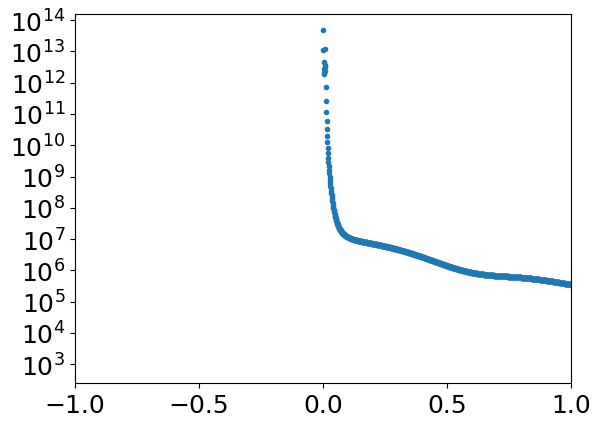

In [301]:
plt.plot(f, np.abs(X)**2, '.')
# plt.plot(f, np.abs(Y)**2, '.')
# plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(-1, 1)

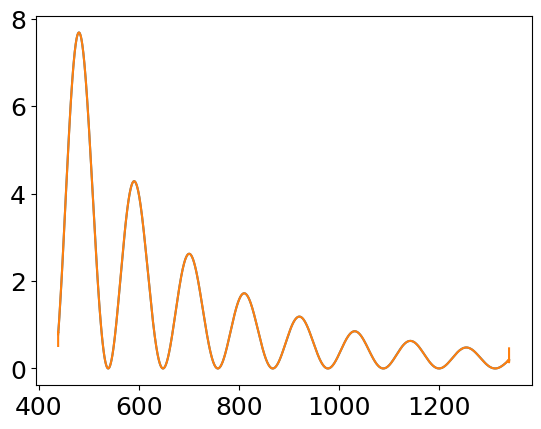

In [302]:
# plt.plot(t, y)
# plt.plot(t, y_)

plt.plot(t, x.real/100)
plt.plot(t, x_.real/100)

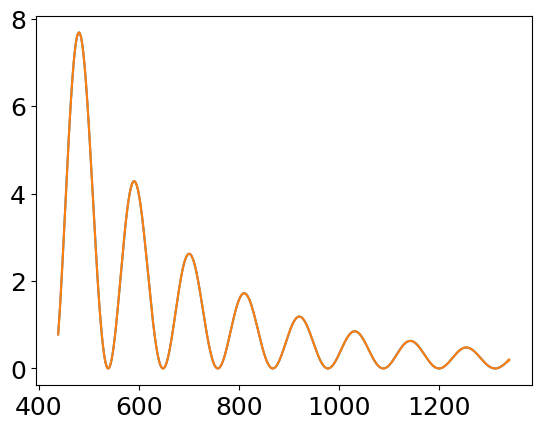

In [303]:
# plt.plot(depad(t), depad(y))
# plt.plot(depad(t), depad(y_))

plt.plot(depad(t), depad(x.real)/100)
plt.plot(depad(t), depad(x_.real)/100)

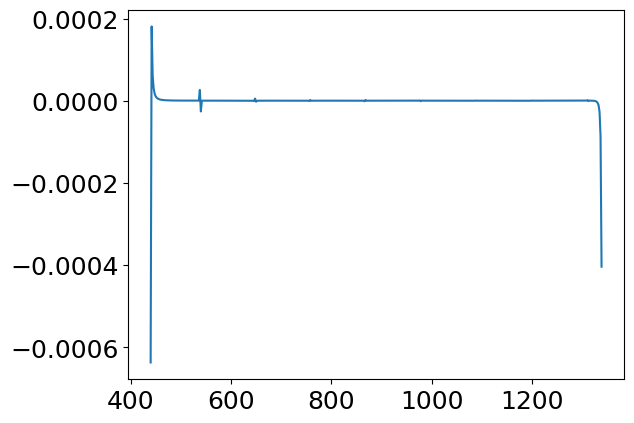

In [308]:
# plt.plot(depad(t), depad(np.abs(x-x_)))
plt.plot(depad(t).reshape(N_time, N_int_samples).mean(axis=1), depad(x-x_).reshape(N_time, N_int_samples).mean(axis=1))
# plt.plot(depad(t), depad(np.abs(y-y_)))

In [1]:
# import xarray as xr
import os

In [2]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np

In [3]:
plt.rcParams['font.size'] = 18

In [4]:
import numpyro
import numpyro.distributions as dist

from jax import random
from numpyro.infer import MCMC, NUTS, Predictive, SVI, autoguide, Trace_ELBO

/Users/chrisfinlay/mambaforge/envs/nifty/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# NumPyro Example

In [5]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

In [6]:
# Eight Schools example
def eight_schools(J, sigma, y=None):
    mu = 5*numpyro.sample('mu', dist.Normal(0, 1))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        theta = mu + tau*numpyro.sample('theta', dist.Normal(0, 1))
        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

In [7]:
nuts_kernel = NUTS(eight_schools)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, J, sigma, y=y, extra_fields=('potential_energy',))

sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 1557.00it/s, 23 steps of size 4.58e-01. acc. prob=0.88]


In [8]:
mcmc.print_summary() 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      0.83      0.72      0.84     -0.26      1.93    393.94      1.00
       tau      3.90      4.15      2.88      0.00      8.10    246.06      1.00
  theta[0]      0.30      0.97      0.35     -1.28      2.01    886.40      1.00
  theta[1]      0.09      0.95      0.10     -1.37      1.66    834.88      1.00
  theta[2]     -0.12      0.93     -0.11     -1.61      1.43   1107.81      1.00
  theta[3]      0.08      0.92      0.08     -1.37      1.59   1544.28      1.00
  theta[4]     -0.16      0.96     -0.14     -1.89      1.27    999.54      1.00
  theta[5]     -0.05      0.93     -0.01     -1.70      1.40   1229.43      1.00
  theta[6]      0.42      0.96      0.46     -1.05      2.00    803.71      1.00
  theta[7]      0.07      0.93      0.10     -1.33      1.69   1152.32      1.00

Number of divergences: 0


In [9]:
# New School
def new_school():
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    return numpyro.sample('obs', dist.Normal(mu, tau))

predictive = Predictive(new_school, mcmc.get_samples())
samples_predictive = predictive(random.PRNGKey(1))
print(np.mean(samples_predictive['obs']))  # doctest: +SKIP

0.9001945


# Adaptive Weiner Filter

In [5]:
def pow_spec(k):
    P0 = 2e3
    return P0 * jnp.where(k==0, 1e5, k**-2)

def pow_spec(k):
    P0 = 2e0
    return P0 * jnp.where(k==0, 1e7, k**-4)

def pow_spec(k, P0=1e5, k_l=1e-2):
    return P0 * jnp.exp(-0.5*(k/k_l)**2)

def pow_spec(k, P0=1e5, k0=1e-2, gamma=4):
    return P0 / ((1. + (k/k0)**2)**(gamma / 2))

In [6]:
N = 2**8
sigma = 1e-1

x = np.arange(N)
k = np.fft.rfftfreq(N, d=np.diff(x)[0])

# y = jnp.fft.irfft(jnp.sqrt(pow_spec(k)) * (np.random.randn(len(k)) + 1.j*np.random.randn(len(k))))

# y_obs = y + sigma*np.random.randn(len(x))

m, c = 0.1, 3

y = m*x**0.8 + c
y_obs = y  + sigma*np.random.randn(len(x))
# y -= y.mean()

In [7]:
Y = np.fft.rfft(y)
Pk = pow_spec(k)

Y_obs = np.fft.rfft(y_obs)

(1.0, 1000000.0)

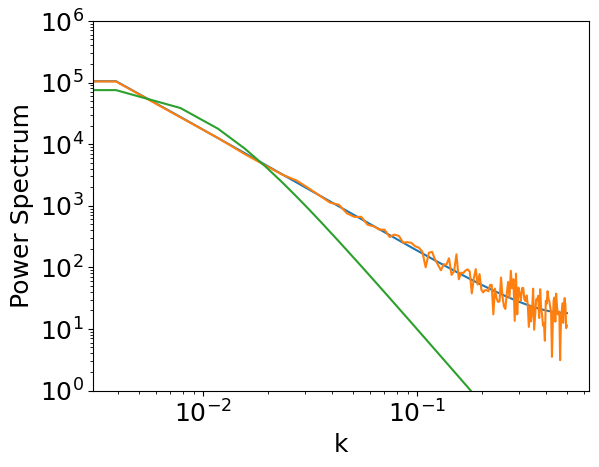

In [8]:
plt.loglog(k, np.abs(Y)**2, label='Noiseless Data')
plt.loglog(k, np.abs(Y_obs)**2, label='Data')
plt.plot(k, Pk, label='Pk')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e0, 1e6)

In [10]:
np.exp(-4)

0.01831563888873418

In [180]:
def model(k, sigma, y=None):
    
    N_k = len(k)
    
    P0 = numpyro.sample('P0', dist.TransformedDistribution(dist.Normal(0, 1), 
                                                           [dist.transforms.AffineTransform(11.5, 1.5),
                                                            dist.transforms.ExpTransform(), 
                                                            ]
                                                          ) 
                       )
    k0 = numpyro.sample('k0', dist.TransformedDistribution(dist.Normal(0, 1), 
                                                           [dist.transforms.AffineTransform(-4, 1),
                                                            dist.transforms.ExpTransform(), 
                                                            ]
                                                          ) 
                       )
    gamma = numpyro.sample('gamma', dist.TransformedDistribution(dist.TruncatedNormal(0, 1), 
                                                                 [dist.transforms.AffineTransform(4, 1),]
                                                                )
                          )
    Pk_root = jnp.sqrt(pow_spec(k, P0, k0, gamma))
    
    Pk_r = numpyro.sample('Pk_r', dist.TransformedDistribution(dist.Normal(0, jnp.ones(N_k)), 
                                                               [dist.transforms.AffineTransform(0, Pk_root),]
                                                              )
                         )
    Pk_i = numpyro.sample('Pk_i', dist.TransformedDistribution(dist.Normal(0, jnp.ones(N_k)), 
                                                               [dist.transforms.AffineTransform(0, Pk_root),]
                                                              )
                         )
    
    
    y_obs = jnp.fft.irfft( Pk_r + 1.j*Pk_i )
    return numpyro.sample('obs', dist.Normal(y_obs, sigma), obs=y)

In [181]:
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, k=k, y=y_obs, sigma=sigma, extra_fields=('potential_energy',))

sample: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:02<00:00, 614.29it/s, 63 steps of size 7.84e-02. acc. prob=0.95]


Text(0.5, 0, 'Sample Number')

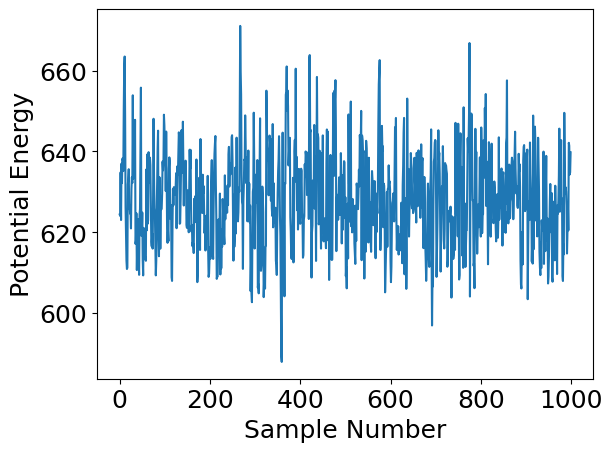

In [182]:
plt.plot(mcmc.get_extra_fields()['potential_energy'])
plt.ylabel('Potential Energy')
plt.xlabel('Sample Number')

In [183]:
samples = mcmc.get_samples()

In [184]:
import corner

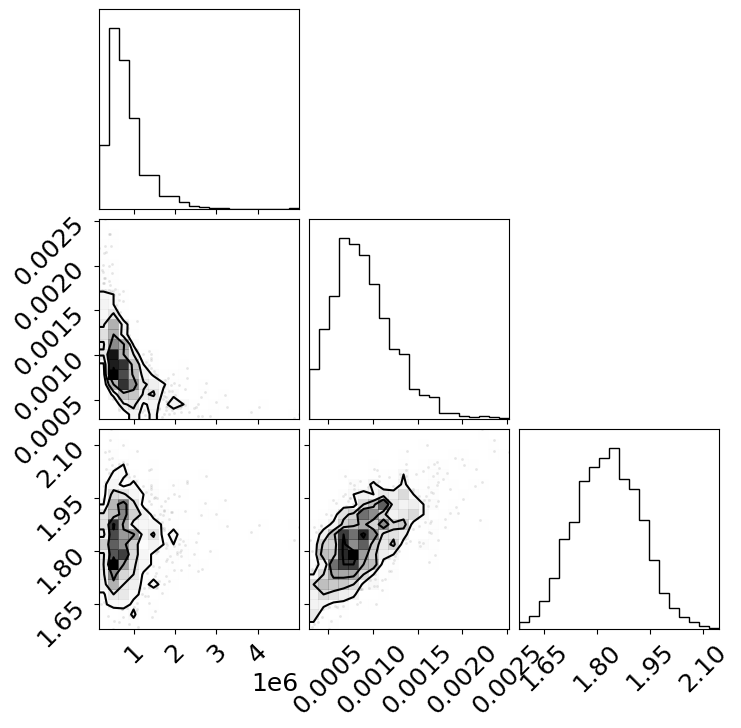

In [185]:
figure = corner.corner(np.vstack([samples['P0'], samples['k0'], samples['gamma']]).T)

In [194]:
# mcmc.print_summary() 

In [187]:
pred = Predictive(model, mcmc.get_samples())
samp_pred = pred(random.PRNGKey(2), k, sigma)

In [188]:
mean = samp_pred['obs'].mean(axis=0)
std = samp_pred['obs'].std(axis=0)

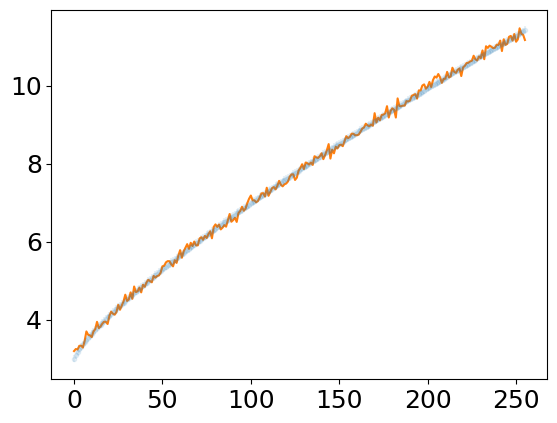

In [189]:
plt.errorbar(x, y, yerr=sigma, fmt='.', alpha=0.1)
plt.plot(x, mean)

In [190]:
np.exp(11.5), np.exp(-3)

(98715.7710107605, 0.049787068367863944)

In [191]:
params = mcmc.get_samples()

Pk_prior = pow_spec(k, np.exp(11.5), np.exp(-4), 2)

Pk_m_base = pow_spec(k, params['P0'].mean(axis=0), params['k0'].mean(axis=0), params['gamma'].mean(axis=0))
Pk_m = np.abs((params['Pk_r'].mean(axis=0) + 1.j*params['Pk_i'].mean(axis=0)))**2

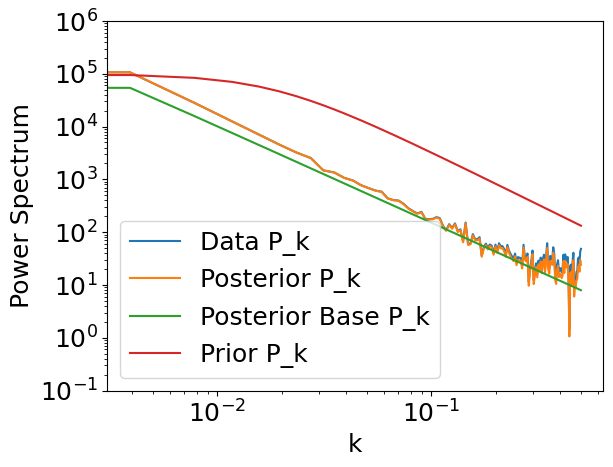

In [192]:
plt.loglog(k, np.abs(Y_obs)**2, label='Data P_k')
plt.loglog(k, Pk_m, label='Posterior P_k')
plt.loglog(k, Pk_m_base, label='Posterior Base P_k')
plt.loglog(k, Pk_prior, label='Prior P_k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e-1, 1e6)
plt.legend()

In [70]:
def run_svi(model, k, sigma, y_obs, max_iter=1_000, guide_family="AutoDelta"):
    if guide_family == "AutoDelta":
        guide = autoguide.AutoDelta(model)
    elif guide_family == "AutoDiagonalNormal":
        guide = autoguide.AutoDiagonalNormal(model)

    optimizer = numpyro.optim.Adam(1e-1)
    svi = SVI(model, guide, optimizer, Trace_ELBO())
    svi_results = svi.run(random.PRNGKey(1), max_iter, k=k, sigma=sigma, y=y_obs)
    params = svi_results.params

    return params, guide

def svi_predict(model, guide, params, k, sigma, num_samples=100):
    predictive = Predictive(
        model=model, guide=guide, params=params, num_samples=num_samples
    )
    predictions = predictive(random.PRNGKey(2), k=k, sigma=sigma, y=None)
    svi_predictions = predictions["obs"].mean(axis=0)
    
    return svi_predictions

# MAP Prediction

In [71]:
print("run MAP.")
map_params, map_guide = run_svi(model, k, sigma, y_obs, max_iter=100_000, guide_family="AutoDelta")
map_predictions = svi_predict(model, map_guide, map_params, num_samples=1, k=k, sigma=sigma)

run MAP.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 16217.42it/s, init loss: 936869.3125, avg. loss [95001-100000]: -80.4555]


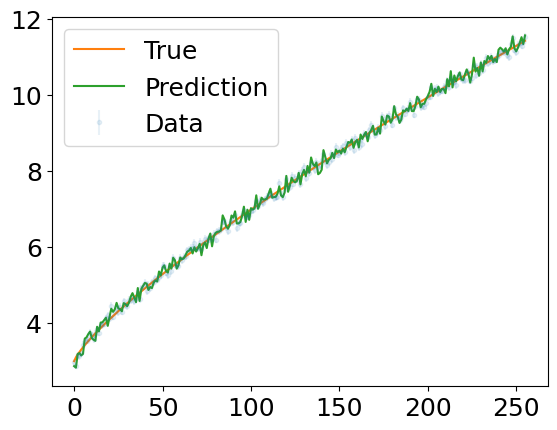

In [72]:
plt.errorbar(x, y_obs, yerr=sigma, fmt='.', alpha=0.1, label='Data')
plt.plot(x, y, label='True')
plt.plot(x, map_predictions, label='Prediction')
plt.legend()

In [102]:
map_mean = map_guide.median(map_params)

Pk_m_base = pow_spec(k, map_mean['P0'], map_mean['k0'], map_mean['gamma'])
Pk_m = Pk_m_base * np.abs((map_mean['Pk_r'] + 1.j*map_mean['Pk_i']))**2

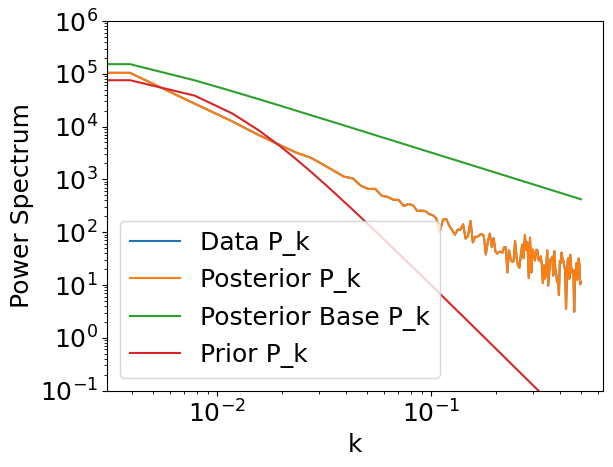

In [103]:
plt.loglog(k, np.abs(Y_obs)**2, label='Data P_k')
plt.loglog(k, Pk_m, label='Posterior P_k')
plt.loglog(k, Pk_m_base, label='Posterior Base P_k')
plt.loglog(k, Pk, label='Prior P_k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e-1, 1e6)
plt.legend()

# VI Prediction

In [104]:
print("run VI.")
vi_params, vi_guide = run_svi(model, k, sigma, y_obs, max_iter=100_000, guide_family="AutoDiagonalNormal")
vi_predictions = svi_predict(model, vi_guide, vi_params, num_samples=100, k=k, sigma=sigma)

run VI.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 15818.31it/s, init loss: 826957.5000, avg. loss [95001-100000]: 326.5265]


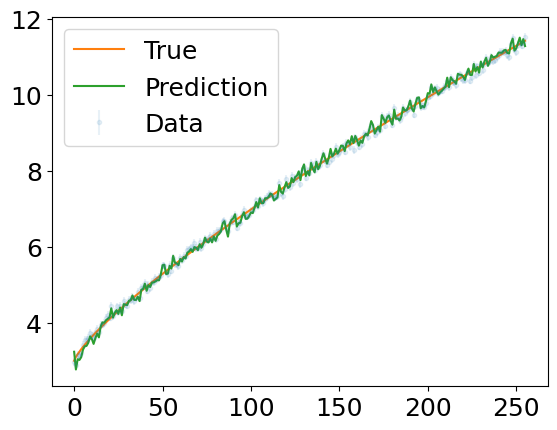

In [105]:
plt.errorbar(x, y_obs, yerr=sigma, fmt='.', alpha=0.1, label='Data')
plt.plot(x, y, label='True')
plt.plot(x, vi_predictions, label='Prediction')
plt.legend()

In [106]:
vi_quantiles = vi_guide.quantiles(vi_params, [0.16, 0.5, 0.84])
vi_mean = vi_guide.median(vi_params)

In [107]:
Pk_m_base = pow_spec(k, vi_mean['P0'], vi_mean['k0'], vi_mean['gamma'])
Pk_m = Pk_m_base * np.abs((vi_mean['Pk_r'] + 1.j*vi_mean['Pk_i']))**2

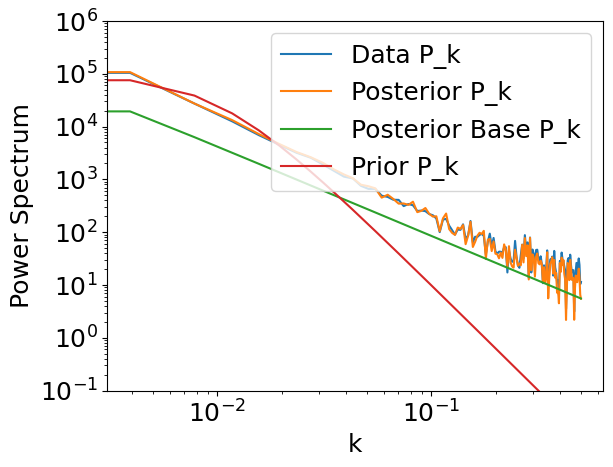

In [108]:
plt.loglog(k, np.abs(Y_obs)**2, label='Data P_k')
plt.loglog(k, Pk_m, label='Posterior P_k')
plt.loglog(k, Pk_m_base, label='Posterior Base P_k')
plt.loglog(k, Pk, label='Prior P_k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e-1, 1e6)
plt.legend()

# Adaptive Weiner Filter

In [135]:
def pow_spec(k):
    P0 = 2e3
    return P0 * jnp.where(k==0, 1e5, k**-2)

def pow_spec(k):
    P0 = 2e0
    return P0 * jnp.where(k==0, 1e7, k**-4)

def pow_spec(k, P0=1e5, k_l=1e-2):
    return P0 * jnp.exp(-0.5*(k/k_l)**2)

def pow_spec(k, P0=1e5, k0=1e-2, gamma=4):
    return P0 / ((1. + (k/k0)**2)**(gamma / 2))

In [136]:
N = 2**8
sigma = 1e-1

x = np.arange(N)
k = np.fft.rfftfreq(N, d=np.diff(x)[0])

# y = jnp.fft.irfft(jnp.sqrt(pow_spec(k)) * (np.random.randn(len(k)) + 1.j*np.random.randn(len(k))))

# y_obs = y + sigma*np.random.randn(len(x))

m, c = 0.1, 3

y = m*x**0.8 + c
y_obs = y  + sigma*np.random.randn(len(x))
# y -= y.mean()

In [137]:
Y = np.fft.rfft(y)
Pk = pow_spec(k)

Y_obs = np.fft.rfft(y_obs)

(1.0, 1000000.0)

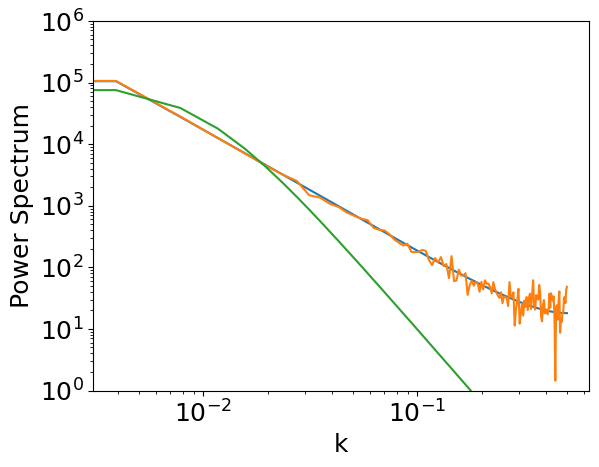

In [138]:
plt.loglog(k, np.abs(Y)**2, label='Noiseless Data')
plt.loglog(k, np.abs(Y_obs)**2, label='Data')
plt.plot(k, Pk, label='Pk')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e0, 1e6)

In [139]:
np.exp(-4)

0.01831563888873418

In [140]:
def model(k, sigma, y=None):
    
    P0 = numpyro.sample('P0', dist.TransformedDistribution(dist.Normal(0, 1), 
                                                           [dist.transforms.AffineTransform(11.5, 1.5),
                                                            dist.transforms.ExpTransform(), 
                                                            ]
                                                          ) 
                       )
    k0 = numpyro.sample('k0', dist.TransformedDistribution(dist.Normal(0, 1), 
                                                           [dist.transforms.AffineTransform(-4, 1),
                                                            dist.transforms.ExpTransform(), 
                                                            ]
                                                          ) 
                       )
    gamma = numpyro.sample('gamma', dist.TransformedDistribution(dist.TruncatedNormal(0, 1), 
                                                                 [dist.transforms.AffineTransform(4, 1),]
                                                                )
                          )
    Pk_root = jnp.sqrt(pow_spec(k, P0, k0, gamma))
    
    Y_phase = numpyro.sample('Y_phase', dist.Normal(0, np.ones(len(k))))
    
    y_obs = jnp.fft.irfft(Pk_root * jnp.exp(1.j*Y_phase))
    return numpyro.sample('obs', dist.Normal(y_obs, sigma), obs=y)

In [141]:
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, k=k, y=y_obs, sigma=sigma, extra_fields=('potential_energy',))

sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 221.55it/s, 255 steps of size 1.43e-02. acc. prob=0.83]


Text(0.5, 0, 'Sample Number')

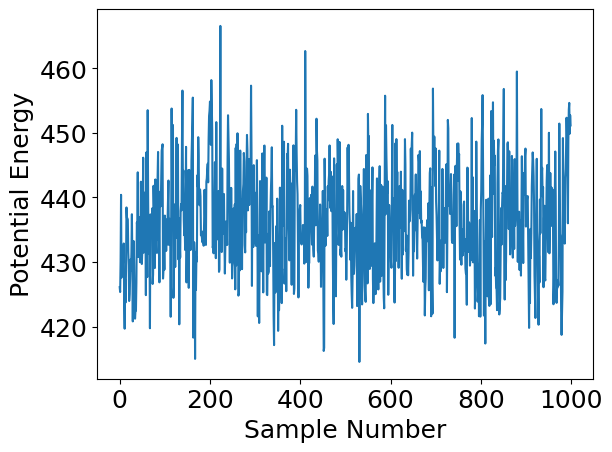

In [142]:
plt.plot(mcmc.get_extra_fields()['potential_energy'])
plt.ylabel('Potential Energy')
plt.xlabel('Sample Number')

In [143]:
samples = mcmc.get_samples()

In [144]:
import corner

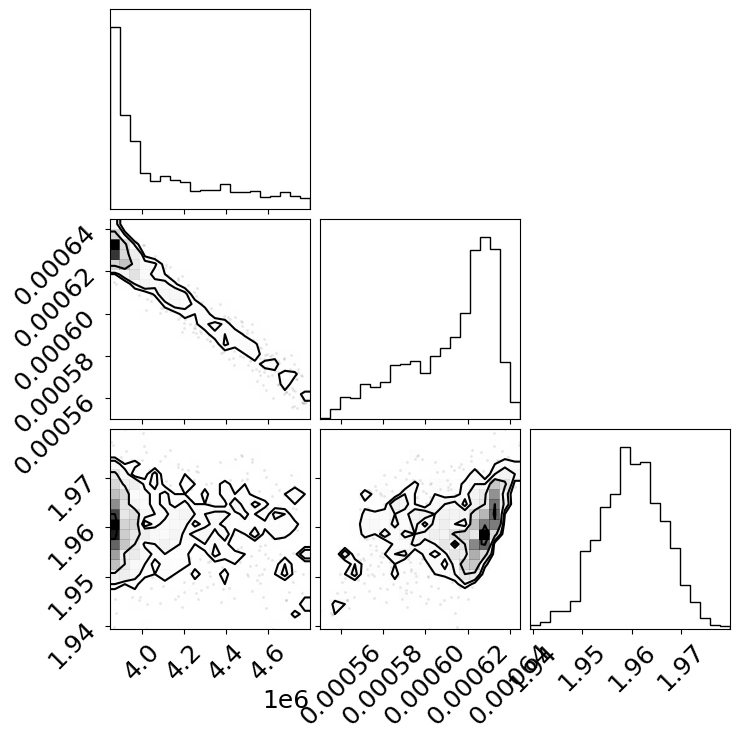

In [145]:
figure = corner.corner(np.vstack([samples['P0'], samples['k0'], samples['gamma']]).T)

In [146]:
# mcmc.print_summary() 

In [147]:
pred = Predictive(model, mcmc.get_samples())
samp_pred = pred(random.PRNGKey(2), k, sigma)

In [148]:
mean = samp_pred['obs'].mean(axis=0)
std = samp_pred['obs'].std(axis=0)

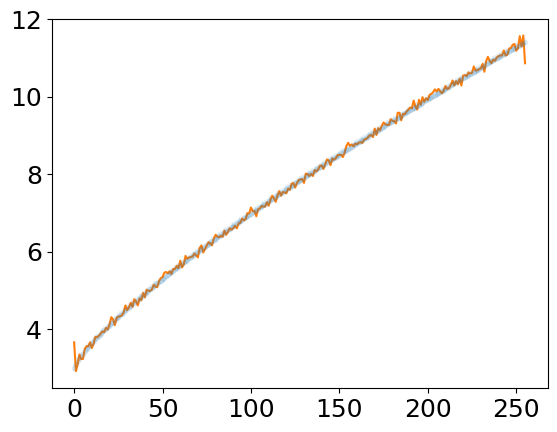

In [149]:
plt.errorbar(x, y, yerr=sigma, fmt='.', alpha=0.1)
plt.plot(x, mean)

In [150]:
np.exp(11.5), np.exp(-3)

(98715.7710107605, 0.049787068367863944)

In [154]:
params = mcmc.get_samples()

Pk_prior = pow_spec(k, np.exp(11.5), np.exp(-4), 2)

Pk_m_base = pow_spec(k, params['P0'].mean(axis=0), params['k0'].mean(axis=0), params['gamma'].mean(axis=0))
Pk_m = Pk_m_base #* np.exp((1.j*params['Y_phase'].mean(axis=0)))

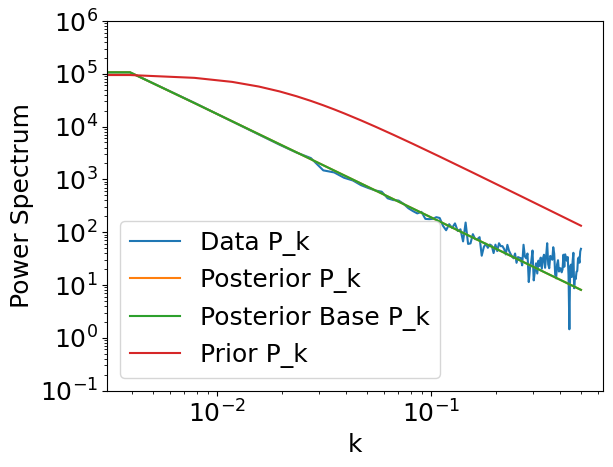

In [155]:
plt.loglog(k, np.abs(Y_obs)**2, label='Data P_k')
plt.loglog(k, Pk_m, label='Posterior P_k')
plt.loglog(k, Pk_m_base, label='Posterior Base P_k')
plt.loglog(k, Pk_prior, label='Prior P_k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e-1, 1e6)
plt.legend()

In [156]:
def run_svi(model, k, sigma, y_obs, max_iter=1_000, guide_family="AutoDelta"):
    if guide_family == "AutoDelta":
        guide = autoguide.AutoDelta(model)
    elif guide_family == "AutoDiagonalNormal":
        guide = autoguide.AutoDiagonalNormal(model)

    optimizer = numpyro.optim.Adam(1e-1)
    svi = SVI(model, guide, optimizer, Trace_ELBO())
    svi_results = svi.run(random.PRNGKey(1), max_iter, k=k, sigma=sigma, y=y_obs)
    params = svi_results.params

    return params, guide

def svi_predict(model, guide, params, k, sigma, num_samples=100):
    predictive = Predictive(
        model=model, guide=guide, params=params, num_samples=num_samples
    )
    predictions = predictive(random.PRNGKey(2), k=k, sigma=sigma, y=None)
    svi_predictions = predictions["obs"].mean(axis=0)
    
    return svi_predictions

# MAP Prediction

In [157]:
print("run MAP.")
map_params, map_guide = run_svi(model, k, sigma, y_obs, max_iter=100_000, guide_family="AutoDelta")
map_predictions = svi_predict(model, map_guide, map_params, num_samples=1, k=k, sigma=sigma)

run MAP.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:05<00:00, 17465.80it/s, init loss: 868743.0625, avg. loss [95001-100000]: 244.2786]


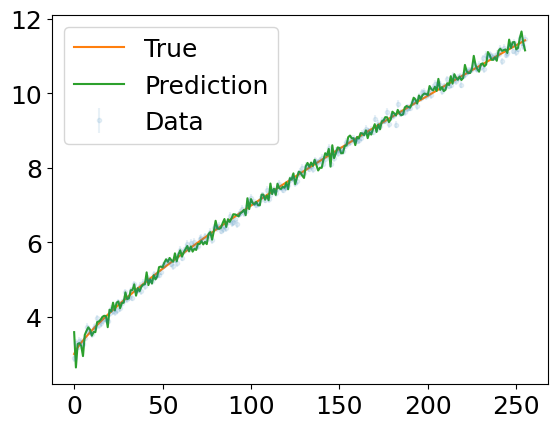

In [158]:
plt.errorbar(x, y_obs, yerr=sigma, fmt='.', alpha=0.1, label='Data')
plt.plot(x, y, label='True')
plt.plot(x, map_predictions, label='Prediction')
plt.legend()

In [159]:
map_mean = map_guide.median(map_params)

Pk_m = pow_spec(k, map_mean['P0'], map_mean['k0'], map_mean['gamma'])

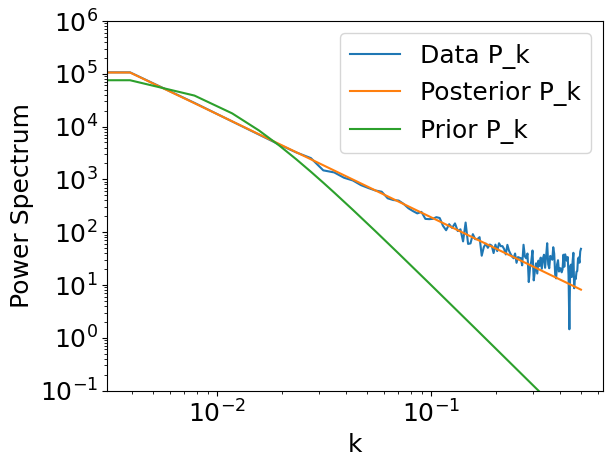

In [160]:
plt.loglog(k, np.abs(Y_obs)**2, label='Data P_k')
plt.loglog(k, Pk_m, label='Posterior P_k')
plt.loglog(k, Pk, label='Prior P_k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e-1, 1e6)
plt.legend()

# VI Prediction

In [165]:
print("run VI.")
vi_params, vi_guide = run_svi(model, k, sigma, y_obs, max_iter=20_000, guide_family="AutoDiagonalNormal")
vi_predictions = svi_predict(model, vi_guide, vi_params, num_samples=100, k=k, sigma=sigma)

run VI.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 13765.00it/s, init loss: 823135.3125, avg. loss [19001-20000]: 575.9650]


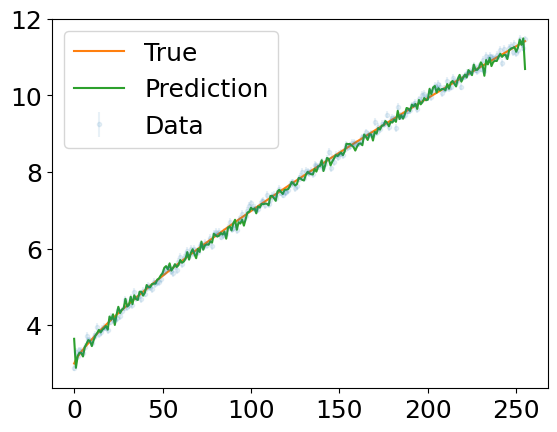

In [166]:
plt.errorbar(x, y_obs, yerr=sigma, fmt='.', alpha=0.1, label='Data')
plt.plot(x, y, label='True')
plt.plot(x, vi_predictions, label='Prediction')
plt.legend()

In [167]:
vi_quantiles = vi_guide.quantiles(vi_params, [0.16, 0.5, 0.84])
vi_mean = vi_guide.median(vi_params)

In [168]:
Pk_m = pow_spec(k, vi_mean['P0'], vi_mean['k0'], vi_mean['gamma'])

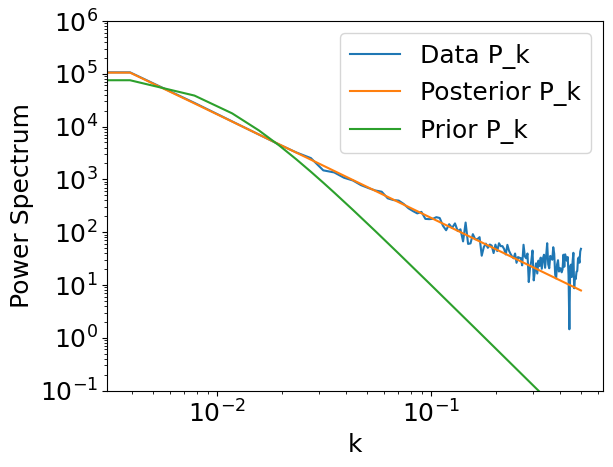

In [169]:
plt.loglog(k, np.abs(Y_obs)**2, label='Data P_k')
plt.loglog(k, Pk_m, label='Posterior P_k')
plt.loglog(k, Pk, label='Prior P_k')
plt.xlabel('k')
plt.ylabel('Power Spectrum')
plt.ylim(1e-1, 1e6)
plt.legend()